In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
img = cv2.imread('./source/s1.jpg')

In [3]:
# [左內眼角], [右內眼角], [鼻尖]
srcTri = [[676, 296], [753, 341], [655, 405]]

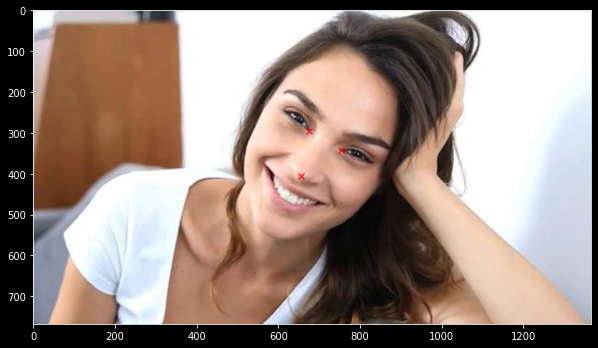

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for x, y in srcTri:
    plt.plot(x, y, 'x', c='red')   

In [5]:
dstTri = [[65, 90], [95, 90], [80, 120]]

In [6]:
srcTri = np.array(srcTri, dtype=np.float32)
dstTri = np.array(dstTri, dtype=np.float32)

In [7]:
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
warp_dst = cv2.warpAffine(img, warp_mat, (190, 160))

In [11]:
X = [np.array([[xi, yi, 1, 0, 0, 0], [0, 0,  0,  xi, yi, 1]]) for xi, yi in srcTri]
X = np.concatenate(X, axis=0)

X_prime = [np.array([[xi], [yi]]) for xi, yi in dstTri]
X_prime = np.concatenate(X_prime, axis=0)

a = X / X_prime

In [13]:
a.shape

(6, 6)

In [ ]:
st = time.time()

sourcePoint = [[x, y] for x, y in itertools.product(range(img.shape[1]), range(img.shape[0]))]
targetPoint = [[x * warp_mat[0, 0] + , y] for x, y in itertools.product(range(img.shape[1]), range(img.shape[0]))]


time.time() - st

In [16]:
warp_mat

array([[ 2.77896766e-01,  1.91154423e-01, -1.79439923e+02],
       [-1.44570572e-01,  2.47376312e-01,  1.14506318e+02]])

In [34]:
st = time.time()
mat = np.concatenate((warp_mat, [[0, 0, 1]]), axis=0)
targetPoint = [(mat @ np.array([[x], [y], [1]]))[:2, 0] for x, y in itertools.product(range(img.shape[1]), range(img.shape[0]))]
sourcePoint = [[x, y] for x, y in itertools.product(range(img.shape[1]), range(img.shape[0]))]

targetPoint = np.array(targetPoint, dtype=np.int32)
sourcePoint = np.array(sourcePoint, dtype=np.int32)

mask = (targetPoint[:, 0] < 160) & (targetPoint[:, 1] < 190) & (targetPoint[:, 1] >= 0) & (targetPoint[:, 0] >= 0)
targetPoint = targetPoint[mask]
sourcePoint = sourcePoint[mask]

dst = np.zeros([190, 160, 3], dtype=np.uint8)
dst[targetPoint[:, 1], targetPoint[:, 0]] = img[sourcePoint[:, 1], sourcePoint[:, 0]]

print(time.time() - st)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1049088

12.412286043167114


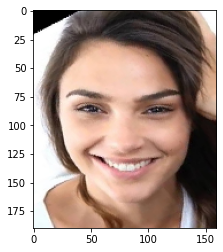

In [30]:
def applyTransform(src, matrix, dst_size):
    dst = np.zeros([dst_size[0], dst_size[1], 3], dtype=np.uint8)
    mat = np.concatenate((matrix, [[0, 0, 1]]), axis=0)
    
   
    for x, y in itertools.product(range(src.shape[1]), range(src.shape[0])):
        raw = np.array([[x], [y], [1]])
        new = mat @ raw

        new = new.astype(np.int32)

        if (new[0] < 0) or (new[0] >= dst.shape[1]):
            continue
        if (new[1] < 0) or (new[1] >= dst.shape[0]):
            continue
        
        dst[new[1], new[0], :] = src[y ,x]

    return dst
import time

st = time.time()
d = applyTransform(img, warp_mat, (190, 160))
print(time.time() - st)
plt.imshow(cv2.cvtColor(d, cv2.COLOR_BGR2RGB))

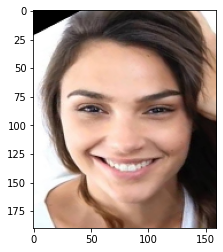

In [9]:
plt.imshow(cv2.cvtColor(warp_dst, cv2.COLOR_BGR2RGB))